Rajesh Singh
PRN : 240840028128

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Question 1


Loading the `Dog_Bite_Data` dataset

In [176]:
df = pd.read_csv('Dog_Bites_Data.csv')

In [177]:
df.columns

Index(['UniqueID', 'DateOfBite', 'Species', 'Breed', 'Age', 'Gender',
       'SpayNeuter', 'Borough', 'ZipCode'],
      dtype='object')

Printing top 15 rows of `'DateOfBite', 'Age', 'Gender', 'SpayNeuter', 'ZipCode'` with no missing data and Gender is noy `'U'`

In [178]:
df_temp = df[['DateOfBite', 'Age', 'Gender', 'SpayNeuter', 'ZipCode']].dropna()
df_temp = df_temp[df_temp['Gender'] != 'U']
print(df_temp.head(15))

         DateOfBite  Age Gender  SpayNeuter ZipCode
3   January 08 2018    4      M       False   11231
5   January 03 2018   4Y      M       False   11231
8   January 04 2018   5Y      M       False   11235
9   January 10 2018   3Y      F       False   11208
11  January 07 2018    7      M        True   11208
14  January 09 2018    5      F        True   11238
18  January 13 2018    7      M       False   11237
20  January 15 2018    8      M        True   11217
21  January 13 2018   11      F        True   11236
25  January 18 2018    3      M        True   11220
26  January 08 2018  13Y      M        True   11215
27  January 18 2018   11      M        True   11214
28  January 18 2018    2      F        True   11230
29  January 17 2018    2      M       False   11211
31  January 21 2018    2      M        True   11231


Removing missing data and drawing colourful plot to dicept Correlation between  `'Breed', 'Gender', 'SpayNeuter'`

In [179]:
# Drop rows with missing values in 'Breed', 'Gender', 'SpayNeuter' columns
df_cleaned = df.dropna(subset=['Breed', 'Gender', 'SpayNeuter'])


In [180]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20445 entries, 0 to 22662
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UniqueID    20445 non-null  int64 
 1   DateOfBite  20445 non-null  object
 2   Species     20445 non-null  object
 3   Breed       20445 non-null  object
 4   Age         11351 non-null  object
 5   Gender      20445 non-null  object
 6   SpayNeuter  20445 non-null  bool  
 7   Borough     20445 non-null  object
 8   ZipCode     15681 non-null  object
dtypes: bool(1), int64(1), object(7)
memory usage: 1.4+ MB


In [181]:
# Converting  'Breed', 'Gender', 'SpayNeuter' columns into numeric fro using sklearn hotencoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_cleaned['Breed'] = label_encoder.fit_transform(df_cleaned['Breed'])
df_cleaned['Gender'] = label_encoder.fit_transform(df_cleaned['Gender'])
df_cleaned['SpayNeuter'] = label_encoder.fit_transform(df_cleaned['SpayNeuter'])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20445 entries, 0 to 22662
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UniqueID    20445 non-null  int64 
 1   DateOfBite  20445 non-null  object
 2   Species     20445 non-null  object
 3   Breed       20445 non-null  int64 
 4   Age         11351 non-null  object
 5   Gender      20445 non-null  int64 
 6   SpayNeuter  20445 non-null  int64 
 7   Borough     20445 non-null  object
 8   ZipCode     15681 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.6+ MB


<ipython-input-181-51f5535c471c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Breed'] = label_encoder.fit_transform(df_cleaned['Breed'])
<ipython-input-181-51f5535c471c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = label_encoder.fit_transform(df_cleaned['Gender'])
<ipython-input-181-51f5535c471c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [182]:
# Create a correlation matrix for the specified columns
correlation_matrix = df_cleaned[['Breed', 'Gender', 'SpayNeuter']].corr()
correlation_matrix

,Breed,Gender,SpayNeuter
Breed,1.000000,0.226448,-0.182276
Gender,0.226448,1.000000,-0.468995
SpayNeuter,-0.182276,-0.468995,1.000000


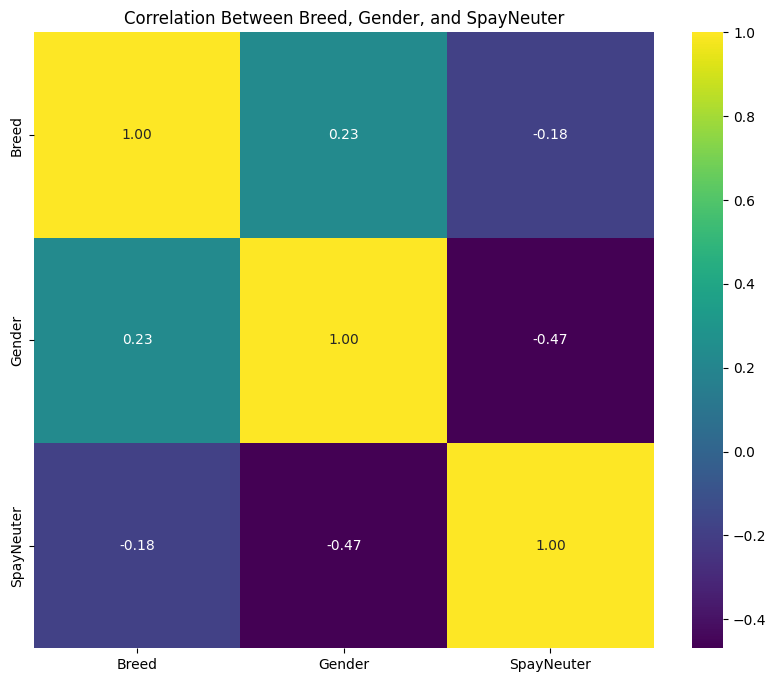

In [183]:
# Create a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Between Breed, Gender, and SpayNeuter')
plt.show()

Removing missing data from Data in Age column ad performing data cleaning, performing an Outlier detection on Age and creating a box plot for the same.

In [184]:
# Removing missing dat from Data in Age column
df_cleaned = df_cleaned.dropna(subset=['Age'])

In [185]:
# performing data cleaning
df_cleaned['Age'] = df_cleaned['Age'].str.replace(' ', '')
df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'].str.extract('(\d+)', expand=False), errors='coerce')
df_cleaned['Age'] = df_cleaned['Age'].fillna(0).astype(int)
print(df_cleaned.head())

    UniqueID       DateOfBite Species  Breed  Age  Gender  SpayNeuter  \
3          4  January 08 2018     DOG   1015    4       1           0   
5          6  January 03 2018     DOG    107    4       1           0   
8          9  January 04 2018     DOG    101    5       1           0   
9         10  January 10 2018     DOG    983    3       0           0   
11        12  January 07 2018     DOG   1648    7       1           1   

     Borough ZipCode  
3   Brooklyn   11231  
5   Brooklyn   11231  
8   Brooklyn   11235  
9   Brooklyn   11208  
11  Brooklyn   11208  


<ipython-input-185-3c205ded623d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = df_cleaned['Age'].str.replace(' ', '')
<ipython-input-185-3c205ded623d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age'] = pd.to_numeric(df_cleaned['Age'].str.extract('(\d+)', expand=False), errors='coerce')
<ipython-input-185-3c205ded623d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [186]:
# performing an Outlier detection on Age
q1 = df_cleaned['Age'].quantile(0.25)
q3 = df_cleaned['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_cleaned[(df_cleaned['Age'] < lower_bound) | (df_cleaned['Age'] > upper_bound)]
print("Outliers in Age:")
print(outliers)

Outliers in Age:
       UniqueID       DateOfBite Species  Breed   Age  Gender  SpayNeuter  \
209         210      May 04 2018     DOG   1647    15       1           1   
216         217      May 01 2018     DOG    660    15       1           1   
921         922      May 04 2019     DOG   1508    31       0           1   
923         924    April 26 2019     DOG   1008    16       1           0   
1351       1352  October 18 2019     DOG    948    16       0           1   
...         ...              ...     ...    ...   ...     ...         ...   
22466     10084      May 13 2017     DOG   1008  2018       2           1   
22523     10141     July 17 2017     DOG   1647  2018       1           0   
22547     10165   August 10 2017     DOG    287    15       1           1   
22570     10188   August 31 2017     DOG    105  2018       2           1   
22613     10231  October 24 2017     DOG   1597    16       0           1   

             Borough ZipCode  
209         Brooklyn   1121

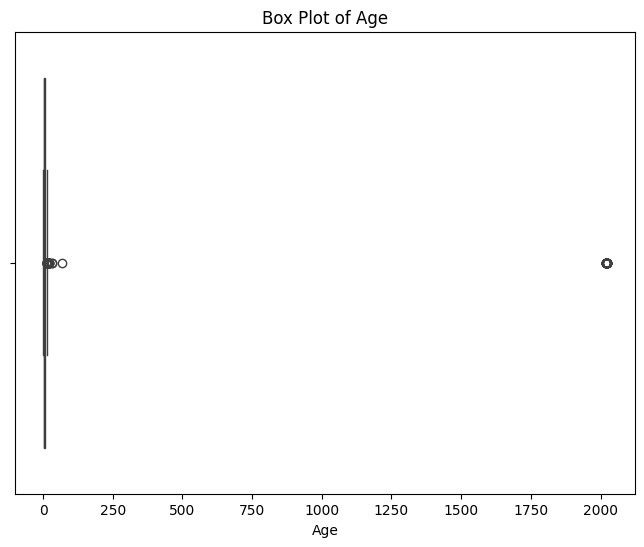

In [187]:
# creating a box plot with outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

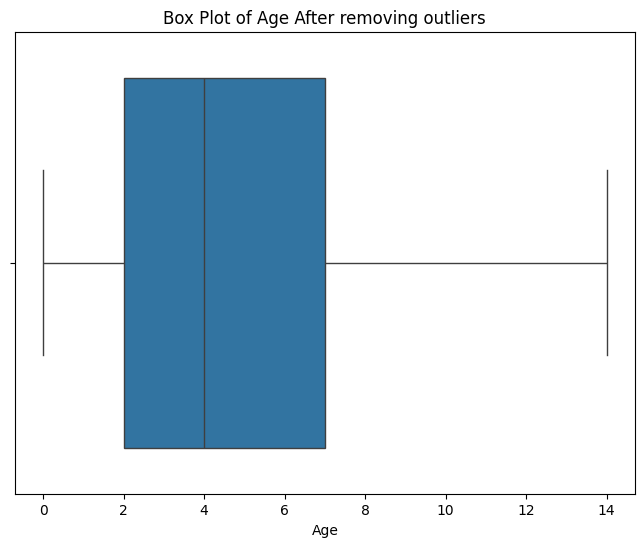

,UniqueID,Breed,Age,Gender,SpayNeuter
count,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000
mean,5805.519034,906.929839,4.872872,0.745386,0.498796
std,3335.317945,482.273656,3.182047,0.470873,0.500021
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2929.000000,473.000000,2.000000,0.000000,0.000000
50%,5892.000000,984.000000,4.000000,1.000000,0.000000
75%,8634.000000,1252.000000,7.000000,1.000000,1.000000
max,12383.000000,1649.000000,14.000000,2.000000,1.000000


In [188]:
# After Removing outliers
df_cleaned = df_cleaned[(df_cleaned['Age'] >= lower_bound) & (df_cleaned['Age'] <= upper_bound)]

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Age'])
plt.title('Box Plot of Age After removing outliers')
plt.xlabel('Age')
plt.show()

df_cleaned.describe()


# Question 2


Using titanic dataset
finding the columns which has missing data in it. If yes the for any column update the missing the data with the mode of its pespective "Pclass" vale

In [189]:
titanic_df = pd.read_csv('Titanic-Dataset.csv')

In [190]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [191]:
# Setting the index
titanic_df.set_index('PassengerId', inplace=True)

In [192]:
# Findding total unqiue values
titanic_df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [193]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [194]:
# Total null values in each columns
titanic_df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [195]:
# Find columsn with missing data
cols_with_missing = titanic_df.columns[titanic_df.isnull().any()].tolist()
cols_with_missing

['Age', 'Cabin', 'Embarked']

In [196]:
# Iterating through columns with missing data and filling missing values with the mode of the respective 'Pclass'
for col in cols_with_missing:
  # Find the mode for each group
  mode_by_pclass = titanic_df.groupby('Pclass')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

  for pclass in titanic_df['Pclass'].unique():
    titanic_df.loc[(titanic_df[col].isnull()) & (titanic_df['Pclass'] == pclass), col] = mode_by_pclass.loc[pclass]

In [197]:
print(titanic_df.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


Performing the Chi-Square test among passaners class (Pclass) and survival (Survived). And displayiong the result.


In [198]:
# Calculate cross tab
passanger_class_survival = pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])
passanger_class_survival

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [199]:
# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(passanger_class_survival)

# Print the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi-Square Statistic: 102.88898875696056
p-value: 4.549251711298793e-23
Degrees of Freedom: 2
Expected Frequencies:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


In [200]:
# Concution
if p < 0.05:
    print("There is a significant association between passanger class and survival.")
else:
    print("There is no significant association between passanger class and survival.")

There is a significant association between passanger class and survival.


Clculateing Mean, Median, Mode, Quartile Range, Standard Deviation of Age for `Male` Passangers

In [201]:
# Selecting age column of male passangers
male_passanger_age_series = titanic_df[titanic_df['Sex'] == 'male']['Age']
male_passanger_age_series.head()

,Age
PassengerId,
1,22.0
5,35.0
6,22.0
7,54.0
8,2.0


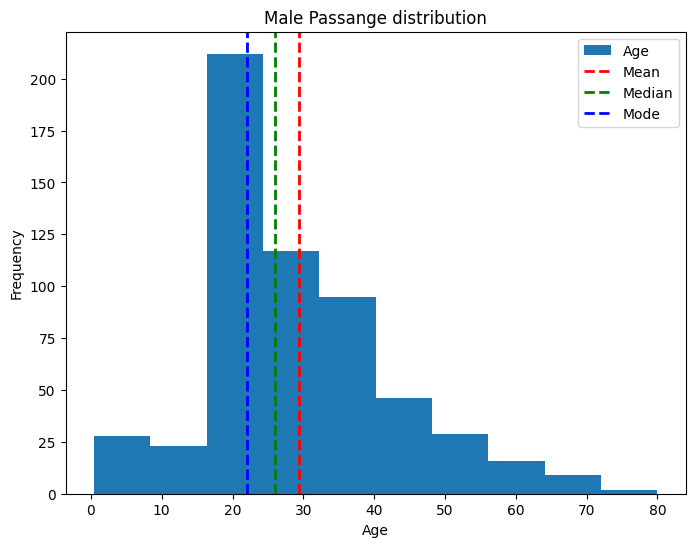

In [202]:
# Plotting the distribution of age with mean, median, mode
plt.figure(figsize=(8, 6))
male_passanger_age_series.plot.hist()
plt.axvline(male_passanger_age_series.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(male_passanger_age_series.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(male_passanger_age_series.mode()[0], color='blue', linestyle='dashed', linewidth=2, label='Mode')
plt.legend()
plt.title("Male Passange distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [203]:
summary_stat = {
    'Mean': male_passanger_age_series.mean(),
    'Median': male_passanger_age_series.median(),
    'Mode': male_passanger_age_series.mode()[0],
    'Quartile Range': male_passanger_age_series.quantile([0.25, 0.75]).values,
    'Standard Deviation': male_passanger_age_series.std()
}

for k,v in summary_stat.items():
    print(f"{k}: {v}")

Mean: 29.355580589254764
Median: 26.0
Mode: 22.0
Quartile Range: [22. 35.]
Standard Deviation: 13.45309398986636
